In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install pycurl

In [3]:
import pandas as pd
#pd.read_json (r'reviews_Movies_and_TV_5.json')

In [4]:
#with open("reviews_Movies_and_TV_5.json") as f:
#    with open("reviews.json", "w") as f1:
#        for line in f:
#            f1.write(line)


In [5]:
import json
reviews=[]
for review in open('reviews_Movies_and_TV_5.json','r'):
    reviews.append(json.loads(review))
print(reviews[0])


{'reviewerID': 'ADZPIG9QOCDG5', 'asin': '0005019281', 'reviewerName': 'Alice L. Larson "alice-loves-books"', 'helpful': [0, 0], 'reviewText': 'This is a charming version of the classic Dicken\'s tale.  Henry Winkler makes a good showing as the "Scrooge" character.  Even though you know what will happen this version has enough of a change to make it better that average.  If you love A Christmas Carol in any version, then you will love this.', 'overall': 4.0, 'summary': 'good version of a classic', 'unixReviewTime': 1203984000, 'reviewTime': '02 26, 2008'}


In [6]:
re=[]
for file in reviews[0:50000]:
    re.append(file)
print(len(re))
    

50000


In [7]:

df = pd.DataFrame() 
for item in re:
    #dfItem = pd.DataFrame.from_records(item) 
    df = df.append(item, ignore_index=True) 
print(df)
print(len(df))




             asin   helpful  overall  \
0      0005019281    [0, 0]      4.0   
1      0005019281    [0, 0]      3.0   
2      0005019281    [0, 0]      3.0   
3      0005019281    [0, 0]      5.0   
4      0005019281    [0, 0]      4.0   
5      0005019281    [0, 0]      5.0   
6      0005019281    [1, 1]      5.0   
7      0005019281    [0, 0]      5.0   
8      0005019281    [0, 0]      5.0   
9      0005019281    [0, 0]      5.0   
10     0005019281    [0, 0]      5.0   
11     0005019281    [0, 0]      5.0   
12     0005019281    [0, 1]      3.0   
13     0005019281    [0, 0]      5.0   
14     0005019281    [1, 1]      4.0   
15     0005019281    [0, 0]      5.0   
16     0005019281    [0, 0]      5.0   
17     0005019281    [0, 0]      4.0   
18     0005019281    [0, 0]      5.0   
19     0005019281    [0, 1]      5.0   
20     0005019281    [0, 2]      2.0   
21     0005019281    [0, 0]      5.0   
22     0005019281    [2, 3]      5.0   
23     0005019281    [0, 0]      5.0   


In [8]:
#import json
#for rev in open('reviews_Movies_and_TV_5.json','r'):
#    jdata = json.loads(rev)
#df = pd.DataFrame(jdata)



In [9]:
print(len(df))

50000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
asin              50000 non-null object
helpful           50000 non-null object
overall           50000 non-null float64
reviewText        50000 non-null object
reviewTime        50000 non-null object
reviewerID        50000 non-null object
reviewerName      49165 non-null object
summary           50000 non-null object
unixReviewTime    50000 non-null float64
dtypes: float64(2), object(7)
memory usage: 3.4+ MB


In [11]:
df.head(500)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0005019281,"[0, 0]",4.0,This is a charming version of the classic Dick...,"02 26, 2008",ADZPIG9QOCDG5,"Alice L. Larson ""alice-loves-books""",good version of a classic,1.203984e+09
1,0005019281,"[0, 0]",3.0,It was good but not as emotionally moving as t...,"12 30, 2013",A35947ZP82G7JH,Amarah Strack,Good but not as moving,1.388362e+09
2,0005019281,"[0, 0]",3.0,"Don't get me wrong, Winkler is a wonderful cha...","12 30, 2013",A3UORV8A9D5L2E,Amazon Customer,Winkler's Performance was ok at best!,1.388362e+09
3,0005019281,"[0, 0]",5.0,Henry Winkler is very good in this twist on th...,"02 13, 2008",A1VKW06X1O2X7V,"Amazon Customer ""Softmill""",It's an enjoyable twist on the classic story,1.202861e+09
4,0005019281,"[0, 0]",4.0,This is one of the best Scrooge movies out. H...,"12 22, 2013",A3R27T4HADWFFJ,BABE,Best Scrooge yet,1.387670e+09
5,0005019281,"[0, 0]",5.0,This has been a favorite movie of mine for a l...,"11 6, 2013",A2L0G56BNOTX6S,barbara whapeles,Dickens updated.,1.383696e+09
6,0005019281,"[1, 1]",5.0,This is the American adaptation of the Charles...,"12 30, 2008",A5NYUBEKXFLX5,"B. Babb ""kites0852""",A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1.230595e+09
7,0005019281,"[0, 0]",5.0,Glad that this american classic came out on dv...,"12 15, 2009",A2DJ8B8GE4V2VD,Berl S. Meyer,An American Christmas Carol,1.260835e+09
8,0005019281,"[0, 0]",5.0,A good Christmas carol dhenry winkler one duri...,"12 5, 2013",AWF2S3UNW9UA0,beth holman,an american christmas carol,1.386202e+09
9,0005019281,"[0, 0]",5.0,How a bitter old man comes to know the true me...,"09 21, 2013",A3O4UUT83DG3OU,Bettylou Sperling,Fantastic!,1.379722e+09


In [12]:
print("Mean rating : {}".format(df['overall'].mean()))
print("Standard deviation of mean rating: {}".format(df['overall'].std()))

Mean rating : 4.26488
Standard deviation of mean rating: 1.11716764492676


Text(0, 0.5, 'count of reviews')

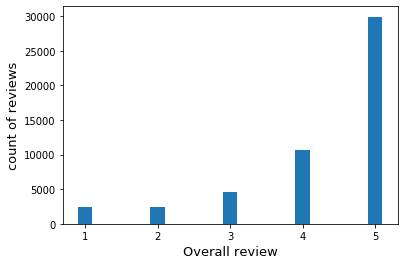

In [13]:
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(df['overall'], bins=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1])
ax.set_xlabel('Overall review', fontsize=13)
ax.set_ylabel('count of reviews', fontsize=13)
#ax.sety_label('count of reviews', fontsize=15)


In [14]:
num_users = len(df['reviewerID'].unique())
num_items = len(df['asin'].unique())

print("Number of reviewers: {}".format(num_users))
print("Number of products : {}".format(num_items))
print("Number of ratings  : {}".format(len(df)))

Number of reviewers: 26789
Number of products : 758
Number of ratings  : 50000


In [15]:
avg_num_reviews = df.groupby('reviewerID')['asin'].count()
print("Avg Number of rating per reviewer {}".format(avg_num_reviews.mean()))

Avg Number of rating per reviewer 1.8664377169733846


Text(0, 0.5, 'number of reviewers')

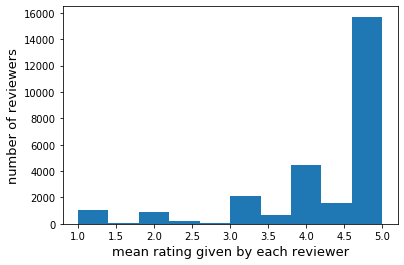

In [16]:
mean_rating_of_user = df.groupby('reviewerID').apply(lambda x: x['overall'].mean())
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each reviewer', fontsize=13)
ax.set_ylabel('number of reviewers', fontsize=13)

In [17]:
# turn each reviewer and product into categorical data,
df['reviewerID'] = df['reviewerID'].astype("category")
df['asin']       = df['asin'].astype("category")

In [18]:
reviews = csc_matrix((df['overall'].astype(float), 
                     (df['reviewerID'].cat.codes,
                      df['asin'].cat.codes)))
reviews.shape

(26789, 758)

In [19]:
ratings_matrix = reviews.toarray()

In [20]:
sparsity = float(len(ratings_matrix.nonzero()[0]))
sparsity /= (ratings_matrix.shape[0] * ratings_matrix.shape[1])
sparsity *= 100
print("Sparsity: {:4.2f}%".format(sparsity))

Sparsity: 0.25%


In [21]:
mean_rating = df['overall'].mean()

In [22]:
base_rmse = np.sqrt(pow(df['overall']-mean_rating, 2).mean())
print("RMSE = {}".format(base_rmse))

RMSE = 1.1171564731944519


In [23]:
# Prediction using cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity
def User_User_CF(reviews):
    user_user_similarity = cosine_similarity(reviews)
    sqdiffs = 0
    num_preds = 0
    eps = 1e-6
    cnt_no_sims = 0
    for user_i, u in enumerate(reviews):
        i_rated = np.where(u>0)[0]
        # Get the average rating for this user
        user_avg =  i_rated.mean()
        # Note: these are all the non-zero entries in the row
        for i_product in i_rated:
            i_has_rated = np.where(reviews[:, i_product])[0]
            i_remove = np.argmin(abs(i_has_rated - user_i))
            i_others_have_rated = np.delete(i_has_rated, i_remove)
            ratings = reviews[i_others_have_rated, i_product]
            ratings -= user_avg
            similarities = user_user_similarity[user_i, i_others_have_rated]
            norm = np.sum(similarities)
            if norm==0:
                cnt_no_sims += 1
                norm = eps
            predicted_rating = user_avg + np.sum(np.multiply(ratings.T, similarities))/norm
            actual_rating = reviews[user_i, i_product]
            sqdiffs += pow(predicted_rating - actual_rating, 2.0)
        num_preds+=1
    
   
    rmse_cossim = np.sqrt(sqdiffs/num_preds)
    return rmse_cossim

In [24]:
user_all_rmse = User_User_CF(ratings_matrix)
print(user_all_rmse)


1.429371121164805


In [25]:
def User_User_CF_TopN(reviews, N):
   # Get the user-user similarity matrix
    user_user_similarity = cosine_similarity(reviews)
    sqdiffs = 0
    num_preds = 0

    # to protect against divide by zero issues
    eps = 1e-6
    cnt_no_sims = 0
    for user_i, u in enumerate(reviews):
        i_rated = np.where(u>0)[0]
        user_avg = i_rated.mean()
        
       
        for i_product in i_rated:
            i_has_rated = np.where(reviews[:, i_product]>0)[0]
        
            # remove the user (indices) of interest 
            # from this column
            i_remove = np.argmin(abs(i_has_rated - user_i))
            i_others_have_rated = np.delete(i_has_rated, i_remove)
        
            # Get the ratings for product by the similar users,
            ratings = reviews[i_others_have_rated, i_product]
            ratings -= user_avg
            sims = user_user_similarity[user_i, i_others_have_rated]
            
            #choose top N most similar users
            most_similar_users = sims[np.argsort(sims*-1)][:N]
            most_similar_ratings = ratings[np.argsort(sims*-1)][:N]
            norm = np.sum(most_similar_users)
            if norm==0:
                cnt_no_sims += 1
                norm = eps
            predicted_rating = user_avg + np.sum(np.multiply(
                                            most_similar_ratings.T,
                                            most_similar_users))/norm
            actual_rating = reviews[user_i, i_product]
        
        # get the L2 difference in predicted and actual
        # rating for the user
        sqdiffs += pow(predicted_rating - actual_rating, 2.0)
        num_preds+=1
    
    # get the average of all the predictions
    rmse_cossim = np.sqrt(sqdiffs/num_preds)
    return rmse_cossim

In [26]:
N_users = [1,2,3,4,5,10,25,50]
top_N   = [User_User_CF_TopN(ratings_matrix, i) for i in N_users]

In [67]:
# make constant vectors
user_all = []
mean_all = []
svd_all=[]
for i in range(len(N_users)):
    user_all.append(user_all_rmse)
    mean_all.append(base_rmse)



In [28]:
#Recommendation system using - Singular Value Decomposition - SVD
counts = df['reviewerID'].value_counts()
df_svd = df[df['reviewerID'].isin(counts[counts >= 50].index)]

In [29]:
df_svd.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
335,0307142493,"[3, 3]",5.0,It is rather ironic to think that the elfin Mi...,"12 3, 2003",A2NJO6YE954DBH,Lawrance M. Bernabo,The charming story of how Kris Kringle became ...,1.070410e+09
432,0307514161,"[1, 1]",5.0,"In just telling the story in the song ""Rudolph...","12 25, 2005",A2NJO6YE954DBH,Lawrance M. Bernabo,The deservedly beloved 1964 Bass-Rakin televis...,1.135469e+09
595,0310263662,"[1, 8]",1.0,Viewed: 5/14Rate: 15/14: The Passion of the Ch...,"05 17, 2014",A1PASRZ81DY9C,Austin Somlo,A Ridiculous Waste of My Time.,1.400285e+09
706,0310263662,"[4, 6]",3.0,GOOD - Kudos for someone finally presenting an...,"09 7, 2007",A39CX0EE4BZCZC,Craig Connell,The Good & Bad Of 'The Passion Of The Christ',1.189123e+09
735,0310263662,"[11, 13]",5.0,This is a difficult film to rate because of th...,"09 1, 2004",A2B73CL3QSYWLB,David Baldwin,Will Gibson's Version Stand the Test of Time?,1.093997e+09


In [30]:
df_svd = df_svd.drop([
'helpful',
'reviewText',
'reviewTime',
'reviewerName',
'summary',
'unixReviewTime'], axis = 1)

In [31]:
df_svd.head()

,asin,overall,reviewerID
335,0307142493,5.0,A2NJO6YE954DBH
432,0307514161,5.0,A2NJO6YE954DBH
595,0310263662,1.0,A1PASRZ81DY9C
706,0310263662,3.0,A39CX0EE4BZCZC
735,0310263662,5.0,A2B73CL3QSYWLB


In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_svd, test_size = 0.3, random_state = 0)

In [33]:
df_svd = df_svd.reset_index()

In [34]:
df_svd.head()

,index,asin,overall,reviewerID
0,335,0307142493,5.0,A2NJO6YE954DBH
1,432,0307514161,5.0,A2NJO6YE954DBH
2,595,0310263662,1.0,A1PASRZ81DY9C
3,706,0310263662,3.0,A39CX0EE4BZCZC
4,735,0310263662,5.0,A2B73CL3QSYWLB


In [35]:
# Creating Sparse matrix with users on row and items on column.
pivot_df = pd.pivot_table(df_svd, index = ["reviewerID"], columns = "asin", values = "overall")
pivot_df.fillna(0, inplace = True)
pivot_df.head()

asin,0307142493,0307514161,0310263662,0310274281,0764001035,0764003828,076400459X,0764005383,0764005448,0764005685,...,078322172X,0783221983,0783222068,0783222149,0783222424,0783222475,078322253X,0783222548,0783222726,0783222734
reviewerID,,,,,,,,,,,,,,,,,,,,,
A10ODC971MDHV8,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A16CZRQL23NOIW,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1PASRZ81DY9C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
A1X054KUYG5V,0.0,0.0,3.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A20EEWWSFMZ1PN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,5.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0


In [40]:
pivot_df.shape

(18, 443)

In [46]:
pivot_df.columns = pd.CategoricalIndex(pivot_df.columns)

pivot_df.columns=pivot_df.columns.add_categories(['user_index'])
# Adding index and removing UserId as Index
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0],1)

In [47]:
pivot_df.set_index(['user_index'], inplace = True)

pivot_df.head()

asin,0307142493,0307514161,0310263662,0310274281,0764001035,0764003828,076400459X,0764005383,0764005448,0764005685,...,078322172X,0783221983,0783222068,0783222149,0783222424,0783222475,078322253X,0783222548,0783222726,0783222734
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
3,0.0,0.0,3.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,5.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0


In [48]:
#SVD Method.
from scipy.sparse.linalg import svds
u, sigma, vt = svds(pivot_df, k = 17)

In [49]:
sigma = np.diag(sigma)
sigma

array([[22.0942153 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 22.89346628,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 23.32561721,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 26.16512938,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

In [50]:
predicted_ratings = np.dot(np.dot(u,sigma),vt)

# Predicted Ratings
pred_df = pd.DataFrame(predicted_ratings, columns = pivot_df.columns)
pred_df.head()

asin,0307142493,0307514161,0310263662,0310274281,0764001035,0764003828,076400459X,0764005383,0764005448,0764005685,...,078322172X,0783221983,0783222068,0783222149,0783222424,0783222475,078322253X,0783222548,0783222726,0783222734
0,0.004558,0.004558,-0.062640,0.038762,0.003646,5.073752,0.082134,0.004558,0.009481,0.003646,...,-0.247582,0.057385,0.048495,0.080885,-0.083052,-0.335533,0.001823,0.015802,0.023930,-0.014698
1,0.000621,0.000621,2.991462,0.005283,0.000497,0.010052,0.011195,0.000621,0.001292,0.000497,...,4.966255,0.007821,0.006610,0.011024,-0.011320,-0.045732,0.000248,0.002154,0.003262,-0.002003
2,0.005478,0.005478,0.924706,0.046592,0.004383,0.088650,0.098725,0.005478,0.011396,0.004383,...,4.702405,0.068977,0.058291,0.097224,-0.099829,2.596687,0.002191,0.018994,0.028764,1.982333
3,-0.011392,-0.011392,3.156571,-0.096886,-0.009114,3.815654,3.794703,-0.011392,-0.023698,-0.009114,...,0.618841,-0.143437,-0.121214,-0.202175,0.207591,0.838680,-0.004557,-0.039497,-0.059813,0.036738
4,-0.001753,-0.001753,0.024098,-0.014912,-0.001403,-0.028373,-0.031598,-0.001753,2.996352,-0.001403,...,5.095248,-0.022077,4.981343,-0.031117,0.031951,4.129084,-0.000701,4.993921,-0.009206,0.005654


In [51]:
# Recommending the items to the given user based on the predicted rating 

def svd_recommender(userId, pivot_df, pred_df, num_recommendations):
    
    user_idx = userId - 1
    # Getting the items that user has already rated
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending = False)
    # Getting the prediction value for the item
    sorted_user_predictions = pred_df.iloc[user_idx].sort_values(ascending = False)
    
    # Creating a temp data frame for the user ratings and predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis = 1)
    temp.index.name = "Recommended Items"
    temp.columns = ["User_ratings", "user_predictions"]
    # Selecting the items that the user hasnt rated i.e for which score is 0
    temp = temp.loc[temp.User_ratings == 0]
    temp = temp.sort_values("user_predictions", ascending = False)
    
    print("\n Below are the recommended movies for user(user_id = {}:\n".format(userId))
    print(temp['user_predictions'].head(num_recommendations))

In [55]:
rmse_df = pd.concat([pivot_df.mean(), pred_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(443, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
asin,,,
0307142493,0.277778,0.279041,0
0307514161,0.277778,0.279041,1
0310263662,2.444444,2.427080,2
0310274281,0.277778,0.288523,3
0764001035,0.222222,0.223233,4


In [56]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.02514 



In [64]:
print("Enter the userid")
userId=int(input())
num_recommendations = 5
svd_recommender(userId, pivot_df, pred_df, num_recommendations)
print("*********************************************************")

Enter the userid
16

 Below are the recommended movies for user(user_id = 16:

Recommended Items
0783113943    0.205406
0783222475    0.183057
0767819462    0.176420
0767827740    0.158371
076781214X    0.157044
Name: user_predictions, dtype: float64
*********************************************************


Text(0.5, 1.0, 'RMSE Error In Recommender Predictions')

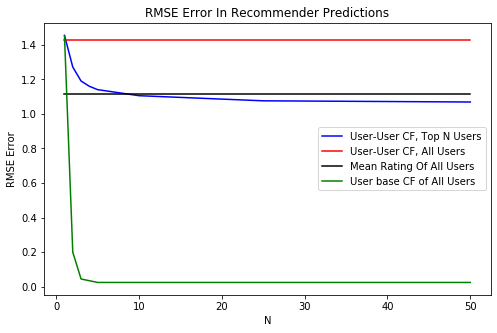

In [73]:

plt.figure(figsize=(8,5))
plt.plot(N_users, top_N,    'b', label = 'User-User CF, Top N Users')
plt.plot(N_users, user_all, 'r', label = 'User-User CF, All Users')
plt.plot(N_users, mean_all, 'k', label = 'Mean Rating Of All Users')
plt.plot(N_users, svd_all, 'g', label = 'User base CF of All Users')
plt.xlabel('N')
plt.ylabel('RMSE Error')
plt.legend()
plt.title('RMSE Error In Recommender Predictions')